# Analysing A/B Test Results
In this project I will be analysing the results of A/B Test done by a e-commerce website on their own website

# Table of Contents
-  Introduction
-  Probability
-  A/B Test

## Introduction
A/B Test are very commonly performed by data analysts and data scientist. This analysis will help decision makers to to take decision whether they should implement new page to their website or keep the old one or perhaps run the expreiment longer to make the decision. 

### Probability


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
 

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [3]:
print ("Number of rows in the df is : {}".format(df.shape[0]))

Number of rows in the df is : 294478


In [4]:
print("Number of Unique users are: {}.".format(df['user_id'].nunique())) 

Number of Unique users are: 290584.


In [5]:
#Here we find the number of users converted and we can do that by getting mean as values are in either 0 or 1
print("Converted users proportion is: {}%".format(df['converted'].mean()*100))

Converted users proportion is: 11.96591935560551%


In [6]:
#In this cell we are calculating the number of times treatment and new_page do not lined up
group1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print("Times treatment group user land incorrectly on old_page: {}".format(len(group1)))

group2 = df.query("group == 'control' and landing_page == 'new_page'")
print("Times control group user land incorrectly on new_page: {}".format(len(group2)))

print("Times new_page and treatment group do not line up: {}".format(len(group1) + len(group2)))

Times treatment group user land incorrectly on old_page: 1965
Times control group user land incorrectly on new_page: 1928
Times new_page and treatment group do not line up: 3893


In [7]:
#Here we can see that there is no null value (no mssing value) in any row of our Dataset by info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
# Let's drop the rows when data is mismatched (the number of rows when treatment group got alligned with old_page
# and control group got alligned with new_page)

#These rows does not serve any purpose in our analysis

df.drop(group1.index, inplace = True)
df.drop(group2.index, inplace = True)

In [9]:
#Deleted rows should be equal to the sum of group1 and group2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
#Let us save the cleaned dataset so that we can use it later
df.to_csv('ab_cleaned.csv', index = False)

In [11]:
#Let us read new dataset into new dataframe
df2 = pd.read_csv('ab_cleaned.csv')

In [12]:
#Let's check that the mismatched rows from our previous dataset is there in our new dataframe or no
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [13]:
#inspect df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [14]:
# unique users id count is
df2['user_id'].nunique()

290584

In [15]:
#In previous cell we saw that there is one user that is repeated. Let's find find out which one.
df2['user_id'].duplicated().sum()
df2[df2['user_id'].duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
#Let us drop the one duplicate value
ts = "2017-01-09 05:37:58.781806"
df2 = df2[df2.timestamp != ts]

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [18]:
#Lets us check once again that length of unique id is equals to total number of rows or not
check = (df2.shape[0]) == (df2['user_id'].nunique())

In [19]:
# What is the probability of an individual converting regardless of the page he/she recieve?

df['converted'].mean()

0.11959667567149027

In [20]:
#What is the probability that an individual converted given that he/she was from control group?

#We can easilty find this just by considering 'control' group.
df2.groupby('group').describe()


converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788164.072594  91287.914601  630002.0  709279.50  788128.5   
treatment  787845.719290  91161.564429  630000.0  708745.75  787876.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.75  945999.0

In [21]:
# we see that mean value of converted 'control' group is 0.120 and this is our probablilty

#What is the probability that an individual converted given that he/she was from control group?
#  we see that mean value of converted 'treatment' group is 0.118808 and this is our probablilty

#Now let's calculate what is the probability that an individual recieved a new page?

print("The probability that an individual recieved a new page is :{}".format((df2['landing_page'] == 'new_page').sum() / len(df2['landing_page']))) 

The probability that an individual recieved a new page is :0.5000619442226688


### A/B Test

Assuming that the old page is better unless the new page proves to be definitely better at a Type 1 error rate of 5%:<br>

My Null Hypothesis is : <br>
-  $p_{new}$ - $p_{old}$ <= 0

Under Null Hypothesis I am assuming that "true" success rate equal to the converted success rate, regardless if it is new or old page. 

Alternative Hypothesis is: <br>
-  $p_{new}$ - $p_{old}$ > 0

The alternative hypothesis is that the difference between the population conversation rate of the users given the new page and the old page will be greater than zero (the new page has a higher population conversion rate).

__Convert Rate__ for $p_{new}$ under the null hypothesis is calculated assuming $p_{new}$ = $p_{old}$. $p_{mean}$ is the average of $p_{new}$ and $p_{old}$



In [22]:
# Here we are calculating the probability of conversion for new page
p_new = df2[df2['landing_page'] == 'new_page']['converted'].mean()
print("Probability of conversion for new page (p_new) = {}".format(p_new))

Probability of conversion for new page (p_new) = 0.11880806551510564


In [23]:
#Here we are calculating the probability of conversion for old page
p_old = df2[df2['landing_page'] == 'old_page']['converted'].mean()
print("Probability of conversion for old page (p_old) = {}".format(p_old))

Probability of conversion for old page (p_old) = 0.1203863045004612


In [24]:
#Here we are taking the mean of these two probability
p_mean = np.mean([p_new, p_old])

print ("Probability of Conversion in Null Hypothesis (p_mean) = {}".format(p_mean))

Probability of Conversion in Null Hypothesis (p_mean) = 0.11959718500778342


In [25]:
#Let us calculate the difference in probability for p_new and p_old
p_diff = p_new - p_old
p_diff
#This just shows that relative probability of each other

-0.0015782389853555567

In [26]:
# Now we calculate the number of landing pages (both- new and old)
n_new, n_old = df2['landing_page'].value_counts()
print ("new pages:", n_new, "\nold pages:", n_old)

new pages: 145310 
old pages: 145274


In [27]:
#Here we will simulate the conversion rate under null hypothesis using the sample size of new and old pages
new_page_converted = np.random.choice([1,0], size = n_new, p = [p_mean, (1-p_mean)])
new_page_converted.mean()

0.11857408299497625

In [28]:
old_page_converted = np.random.choice([1,0], size = n_old, p = [p_mean, (1-p_mean)])
old_page_converted.mean()

0.11922986907498934

In [29]:
#Let us calculate the difference in probability of new page and old page converted just to see the relative probabilites
p_diff_new = new_page_converted.mean() - old_page_converted.mean()
p_diff_new

-0.0006557860800130849

In [30]:

# In this step we will be simulating 10,000 (p_new - p_old) values 
p_diffs = []

for i in np.arange(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p = [p_mean, (1-p_mean)])
    old_page_converted = np.random.choice([1,0], size = n_old, p = [p_mean, (1-p_mean)])
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)
    


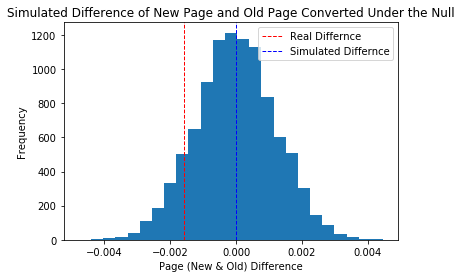

In [31]:
# Let us plot histogram of p_diffs

plt.hist(p_diffs, bins = 25)
plt.title("Simulated Difference of New Page and Old Page Converted Under the Null")
plt.xlabel('Page (New & Old) Difference')
plt.ylabel('Frequency')
plt.axvline(x=(p_new - p_old), color = 'r', linestyle = 'dashed' , linewidth=1, label = 'Real Differnce')
plt.axvline(x=(np.array(p_diffs).mean()), color = 'b', linestyle = 'dashed', linewidth = 1, label = 'Simulated Differnce')
plt.legend()
plt.show()

In [32]:
p_diff = p_new - p_old
p_diff

-0.0015782389853555567

In [33]:
greater_than_diff = [i for i in p_diffs if i > p_diff]


In [34]:
# Here we are just printing out the values of our previous calculation

print("Actual differnce:" , p_diff)

p_greater_than_diff = len(greater_than_diff)/len(p_diffs)

print("Proportion greater than actual difference:" , p_greater_than_diff)
print("As a percentage: {}".format(p_greater_than_diff*100))

Actual differnce: -0.0015782389853555567
Proportion greater than actual difference: 0.8979
As a percentage: 89.79


In [35]:
#We have a module in pyhton to calculate the p value and z score

import statsmodels.api as sm

#convert_old = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)])
#convert_new = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)])

convert_old = sum(df2.query("group == 'control'") ['converted'])
convert_new = sum(df2.query("group == 'treatment'") ['converted'])

print("convert_old:" ,convert_old,
     "\nconvert_new:", convert_new,
     "\nn_old:" ,n_old,
     "\nn_new:" ,n_new)

convert_old: 17489 
convert_new: 17264 
n_old: 145274 
n_new: 145310


In [36]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new], alternative = 'smaller')
print("z-score:", z_score, "\np-value:", p_value)

z-score: 1.3109241984234394 
p-value: 0.9050583127590245


Here we can see that __Z-Score__ is 1.3109 . Z-Score is the number of standard deviations from the mean a data point is. <br>
We see that p-Value of 0.90505 is significant enough to tell us not to reject Null Hypothesis. Looking at the result, we will keep the Null Hypothesis. 



In [37]:
#Logistic Regression Approach
df3 = df2


In [38]:
df3['intercept'] = pd.Series(np.zeros(len(df3)))

In [39]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0.0


In [40]:
df3['ab_page'] = pd.Series(np.zeros(len(df3)))
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0.0,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0.0,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0.0,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0.0,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0.0,0.0


In [41]:
change_index = df3[df3['group'] == 'treatment'].index

df3.set_value(col = 'ab_page', index = change_index, value = 1)
df3.set_value(col = 'intercept',index = df3.index, value = 1)

df3[['intercept', 'ab_page']] = df3[['intercept', 'ab_page']].astype(int)
df3.head()


/Users/abhishekduhan/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/abhishekduhan/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [42]:
df3 = df3[['user_id', 'timestamp', 'group', 'landing_page', 'intercept','ab_page','converted']]
df3.head()

,user_id,timestamp,group,landing_page,intercept,ab_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [43]:
df3[df3['group'] == 'treatment'].head()

,user_id,timestamp,group,landing_page,intercept,ab_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


In [44]:
logit = sm.Logit(df3['converted'], df3[['ab_page', 'intercept']])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [45]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        22:37:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""